In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

# **Support Vector Machines (SVM)**

## Introduction 
One of the most important concepts in the field of Machine Learning is **classification**. It's widely used in email SPAM detection, image recognition, face recognition, **sentiment analysis** and many more. The main problem of traditional ML algorithms for classification is handling high-dimensional data. One algorithm that solves that problem is **Support Vector Machine (SVM)**. What allows SVM to work with high-dimentional data is a clever technique called the **Kernel trick**. In this tutorial I'm going to explain Support Vector Machines, the mathematical concepts behind them, their methods, what is the Kernel trick and how it works, implementations and applications. Support Vector Machine is a powerful **supervised** machine learning algorithm that is used for linear or non-linear classification, regression and outlier detection.The primary objective of the SVM algorithm is to find the optimal **hyperplane** in an N-dimentional space(N-number of **features**) that can separate the **data points** of different classes in the feature space.This separation is achieved with the maximum possible **margin**.

methodologies and math concepts 
1. how does it work
2. vsichki drugi gluposti
3. nekvi drugi raboti
4. kernel trick/kernel functions

## Some definitions and explanations to make things more clear
1. **Classification** is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.[1]

2. **Sentiment analysis** is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.[2]

3. **Supervised** machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled data sets to train algorithms that to classify data or predict outcomes accurately.[3] SVM's are a supervised algorithm because they need labeled data to find the hyperplane in the first place.

4. **Hyperplane** is a decision boundary that separates data points into different classes. In two-dimensional space, a hyperplane is simply a line that separates the data points into two classes. In three-dimensional space, a hyperplane is a plane that separates the data points into two classes.[4] It divides the input space into two or more regions, each corresponding to a different class or output label.[5]

5. **Data points**- In the case of support vector machines, a data point is viewed as a N-dimensional vector (a list of numbers), and we want to know whether we can separate such points with a N-dimensional hyperplane.[6]

6. **Features** is an individual measurable property within a recorded dataset. In machine learning and statistics, features are often called “variables” or “attributes”.[7] Some example features in a dataset could be age, height, weight

7. **Margin** is the distance between the decision boundary (hyperplane) and the closest data points from each class. The main objective of the support vector e algorithm is to maximize the margin. The wider margin indicates better classification performance.[8][9] 

8. **Support vectors** are the closest data points to the hyperplane. These data points are important because they determine the position and orientation of the hyperplane.[10]

9. **Linear SVM** tries to find a straight line (in 2D) or a hyperplane (in higher dimensions) that separates the data into different classes with the maximum possible margin.[11]

10. **Hard Margin**

11. **Soft Margin**

12. **Outlier**

13.**Missclasification** 

14. **Non-Linear SVM** 

## Methodologies, math concepts and definitions

### How does (Linear) SVM work - Basic intuition....
I shall not scare you away with much theory and math still. I will introduce you to the algorithm by explaining it simply.
Each object of the dataset is represented as a point in an N-dimensional space. SVM's performs classification by "drawing" a hyperplane and all points of one category are on one side of the hyperplane, and all points of the other category are on the otherside.There could be multiple hyperplanes but SVM tries to find the one that best seperates the categories in the sense that it maximizes the distance to points in either category.The distance is called the margin and the points that fall on the margin are called support vectors. To find the hyperplane SVM requires a training set of points already labeled with the category, that is why it's a supervised algorithm. In other words SVM needs those support vectors in order to determine where to position the hyperplane. The ideal hyperplane is the one that is positioned equally half-way between the two support vectors.[12]

Did i scare you away yet?? Good, then I shall make life "easier" by giving an example of how **linear SVM** works, because it's key to understanding the basics which we are going to built on. 

Let's imagine that we have a dataset that has two tags (green and blue), and the dataset has two features x1 and x2. We want a classifier that can classify the pair(x1, x2) of coordinates in either green or blue.

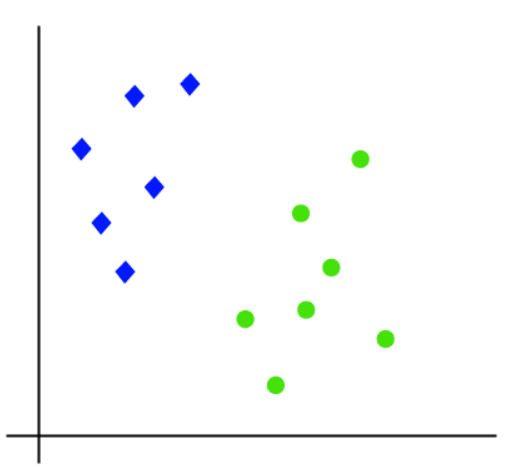 [13]

By the looks of it it's a 2-d space so by just using a straight line, we can easily distinguish these two classes. But there can be multiple lines(hyperplanes) that can separate these classes.

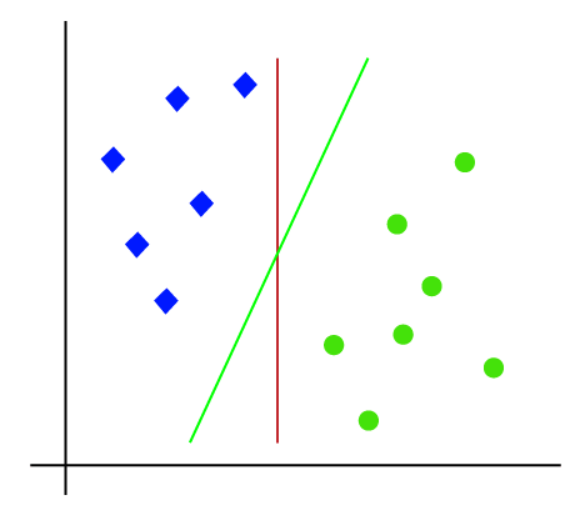  [13]

SVM finds the one that represents the largest separation or margin between the two classes. The algorithm finds the closest points from both classes, also called the support vectors and it "draws" the line in such a way that it's position and orientation maximize the distance between the two points. That is what we call the optimal hyperplane. To put it simply, the support vectors supervise the creation of the hyperplane.

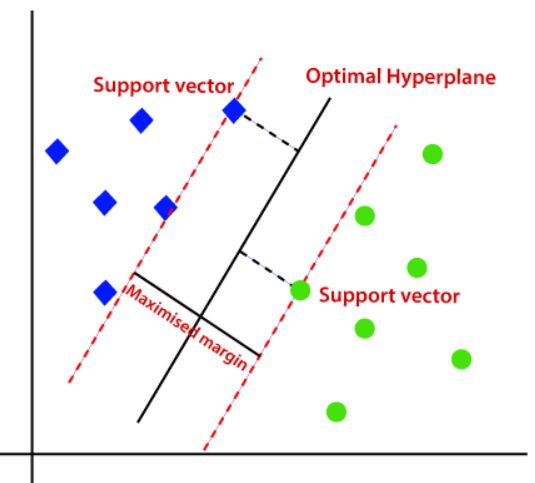 [13]

And that way we separated the two classes of the linear SVM, every object on the left side of the hyperplane would be categorized as blue and every object on the right side would be categorized as green. Every new observation with features that position it in either side of the hyperplane would be classified depending on which side it will be.

So far so good, we found the hyperplane whose distance to the nearest data point on each side is maximized. If such a hyperplane exists it is known as the maximum-margin hyperplane or the **hard margin**. The hard margin works amazing when the data is perfectly linearly seperable, but what happens when things aren't perfect, which is the case in most real life situations. 

Let's see what happens if we have another situation where we have seperated two classes of blue and red circles, but there is one problem, we have **outlier** that is not where it belongs, a blue point in the red side of the hyperplane. This is called **missclasification**. Hard margins were amazing until now, but they don't work well with missclasifications. Every single outlier can make it impossible for them to find a perfect separation. 

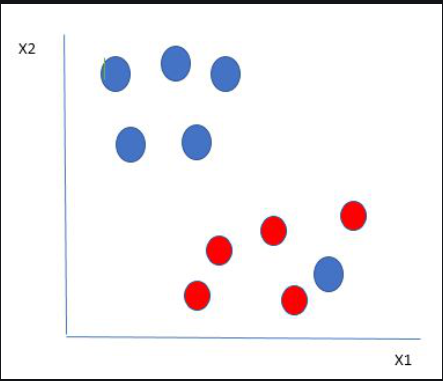 [14]

This still counts as linear SVM, but the outlier makes it almost impossible for the hard-margin technique to succeed in it's purpose. In these situations we use a technique called **soft margin**. A soft margin SVM is used when the data is not perfectly separable. It allows some misclassifications to achieve a better overall separation. In this situation SVM finds the maximum margin as done with previous data sets. Along with that it adds a **penalty** each time a point crosses the margin. It introduces a penalty term for misclassifications, allowing for a trade-off between maximizing the margin and minimizing classification errors.

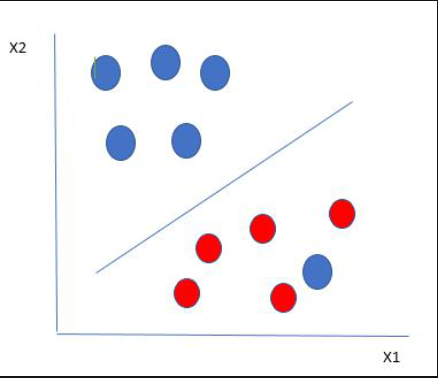 [14]

This was a pretty vague explanation of soft margin, but don't worry I will dwelve into it in a bit.

Furthermore what happens when data is not even linearly seperable anymore, something like this.

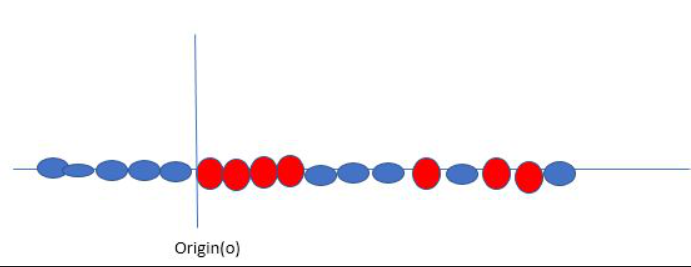 [14]

And that's where we use **Non-linear SVM's**, but in order for me to explain them in an understandable and useful manner I shall end with the "basic" part here and explain everything from the beginning, but this time with more theory and a "little bit" of math.

 

implementation
1.code - scikit learn
2. code- if posssible manual 

applications 
1. why are they universal
2. neural networks
3. other apllications

conclusion


bibliography